In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

In [3]:
df = pd.read_csv('data/heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [6]:
df[['Blood Pressure top number', 'Blood Pressure bottom number']] = df['Blood Pressure'].str.split('/', expand=True)
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Blood Pressure top number,Blood Pressure bottom number
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


Dependent column - Heart Attack Risk

Categorical columns:
Sex
Diabetes
Family History
Smoking
Obesity
Alcohol Consumption
Diet
Previous Heart Problems
Medication Use
Stress Level
Country
Continent
Hemisphere

Non categorical columns:
Age
Cholesterol
Blood Pressure (Object datatype but separated as top and bottom number)
Heart Rate
Exercise Hours Per Week
Sedentary Hours Per Day
Income
BMI
Triglycerides
Physical Activity Days Per Week
Sleep Hours Per Day
Blood Pressure top number
Blood Pressure bottom number

In [7]:
# Define the continuous features
continuous_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Blood Pressure top number', 'Blood Pressure bottom number']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                            object
Family History                      object
Smoking                             object
Obesity                             object
Alcohol Consumption                 object
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems             object
Medication Use                      object
Stress Level                        object
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Sedentary Hours Per Day,8763.0,5.993690,3.466359,0.001263,2.998794,5.933622,9.019124,11.999313
Income,8763.0,158263.181901,80575.190806,20062.000000,88310.000000,157866.000000,227749.000000,299954.000000
BMI,8763.0,28.891446,6.319181,18.002337,23.422985,28.768999,34.324594,39.997211
Triglycerides,8763.0,417.677051,223.748137,30.000000,225.500000,417.000000,612.000000,800.000000
Physical Activity Days Per Week,8763.0,3.489672,2.282687,0.000000,2.000000,3.000000,5.000000,7.000000
Sleep Hours Per Day,8763.0,7.023508,1.988473,4.000000,5.000000,7.000000,9.000000,10.000000


In [9]:
df.describe(include='object')

,Patient ID,Sex,Blood Pressure,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Diet,Previous Heart Problems,Medication Use,Stress Level,Country,Continent,Hemisphere,Heart Attack Risk,Blood Pressure top number,Blood Pressure bottom number
count,8763,8763,8763,8763,8763,8763,8763,8763,8763,8763,8763,8763,8763,8763,8763,8763,8763,8763
unique,8763,2,3915,2,2,2,2,2,3,2,2,10,20,6,2,2,91,51
top,BMW7812,Male,146/94,1,0,1,1,1,Healthy,0,0,2,Germany,Asia,Northern Hemisphere,0,102,83
freq,1,6111,8,5716,4443,7859,4394,5241,2960,4418,4396,913,477,2543,5660,5624,123,198


IndexError: index 2 is out of bounds for axis 1 with size 2

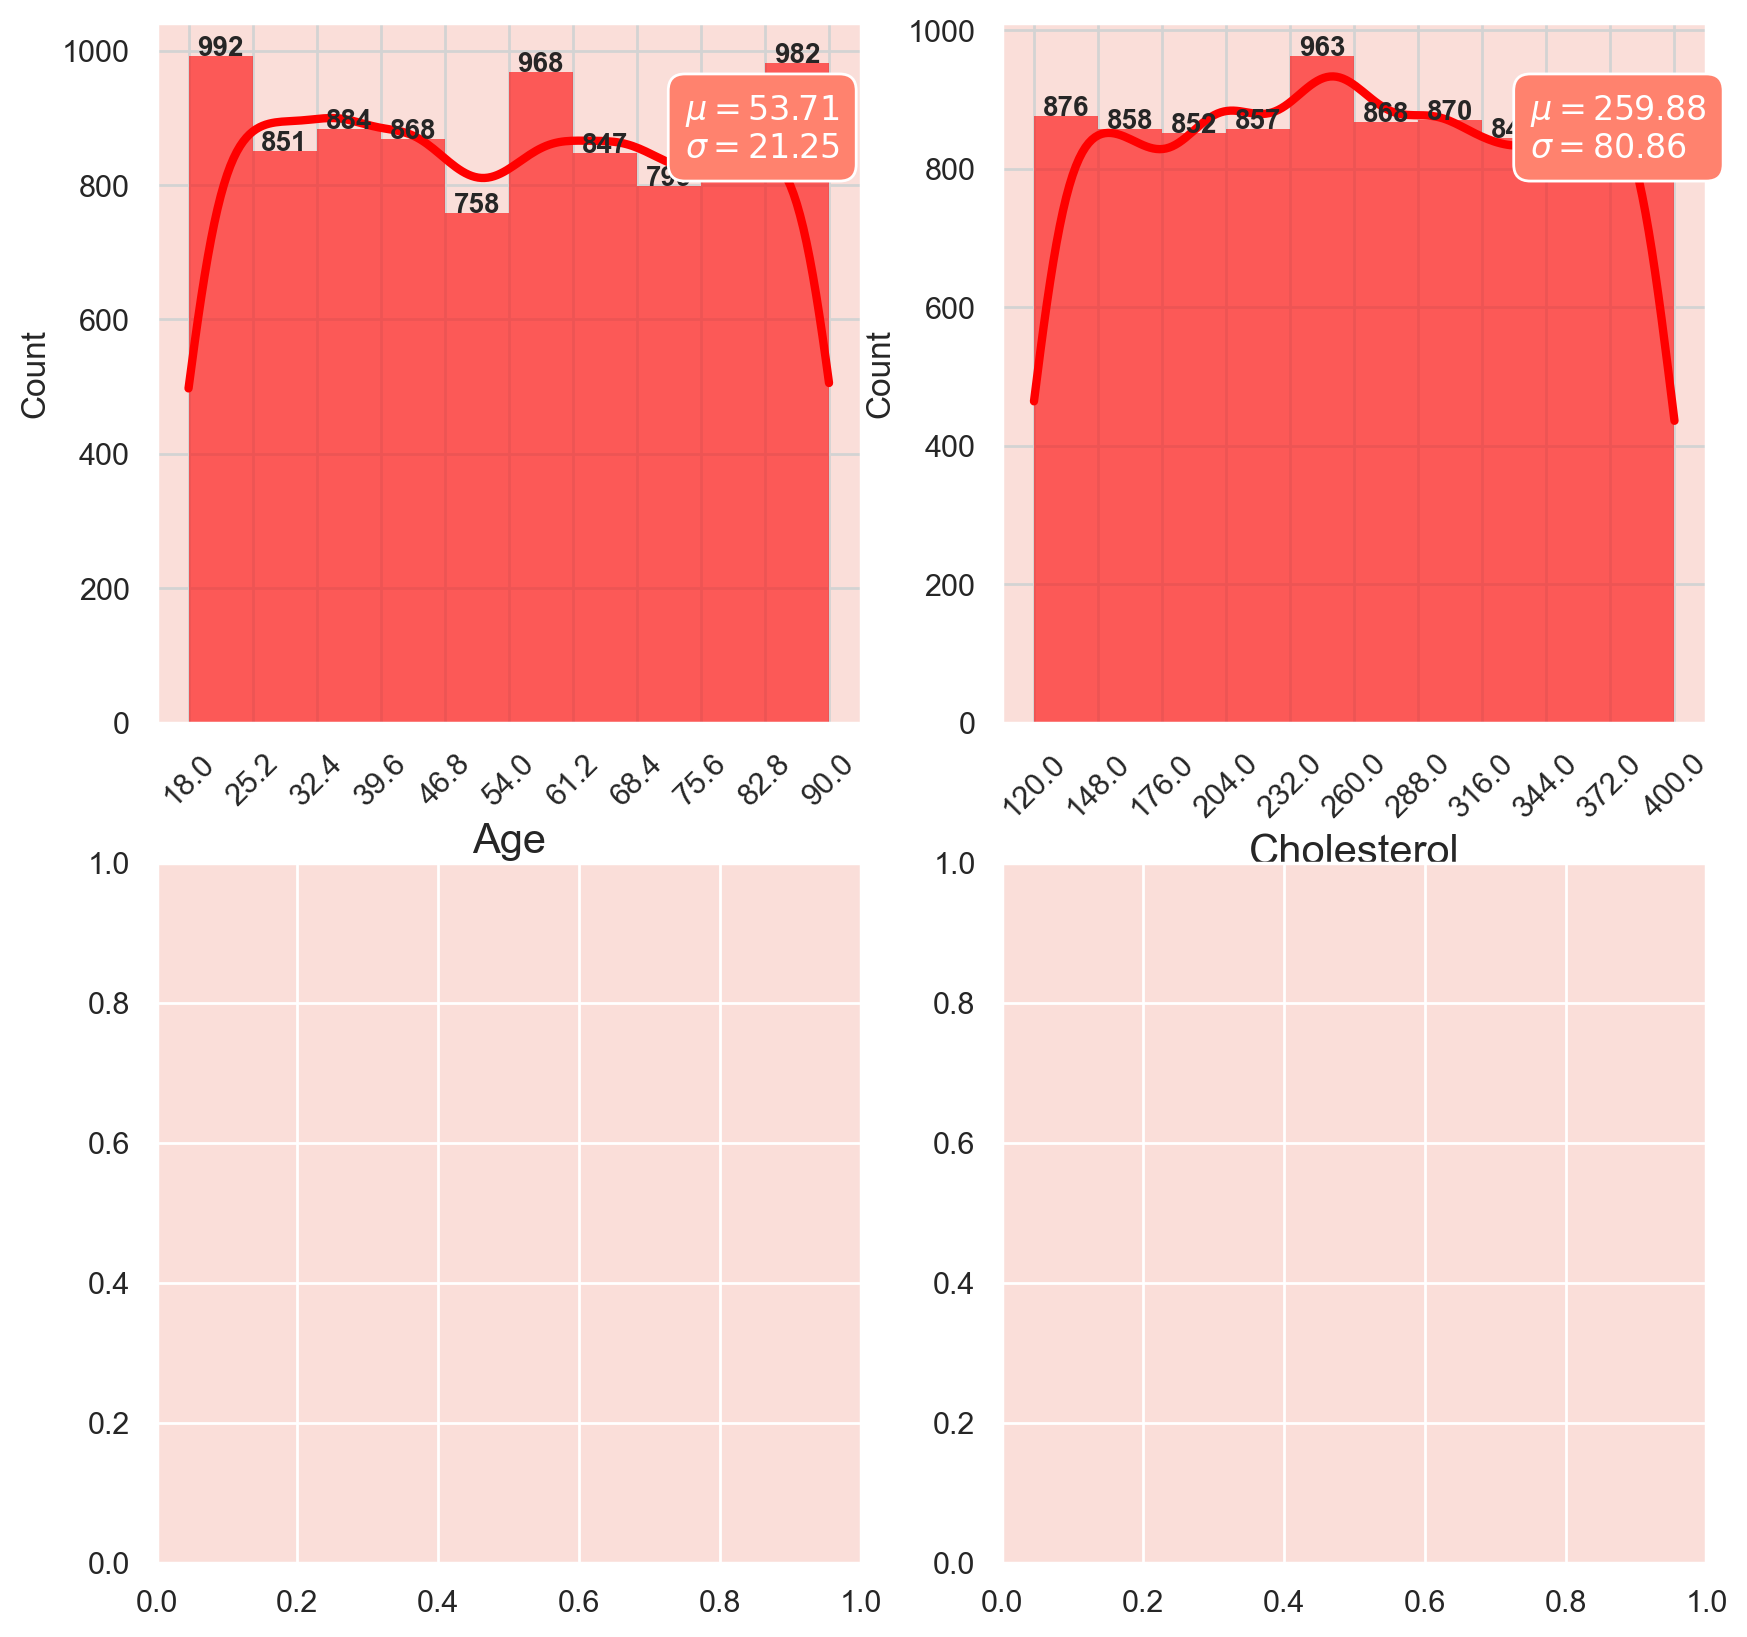

In [10]:
# Filter out continuous features for the univariate analysis
df_continuous = df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [12]:
# Filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]

IndexError: index 6 is out of bounds for axis 0 with size 6

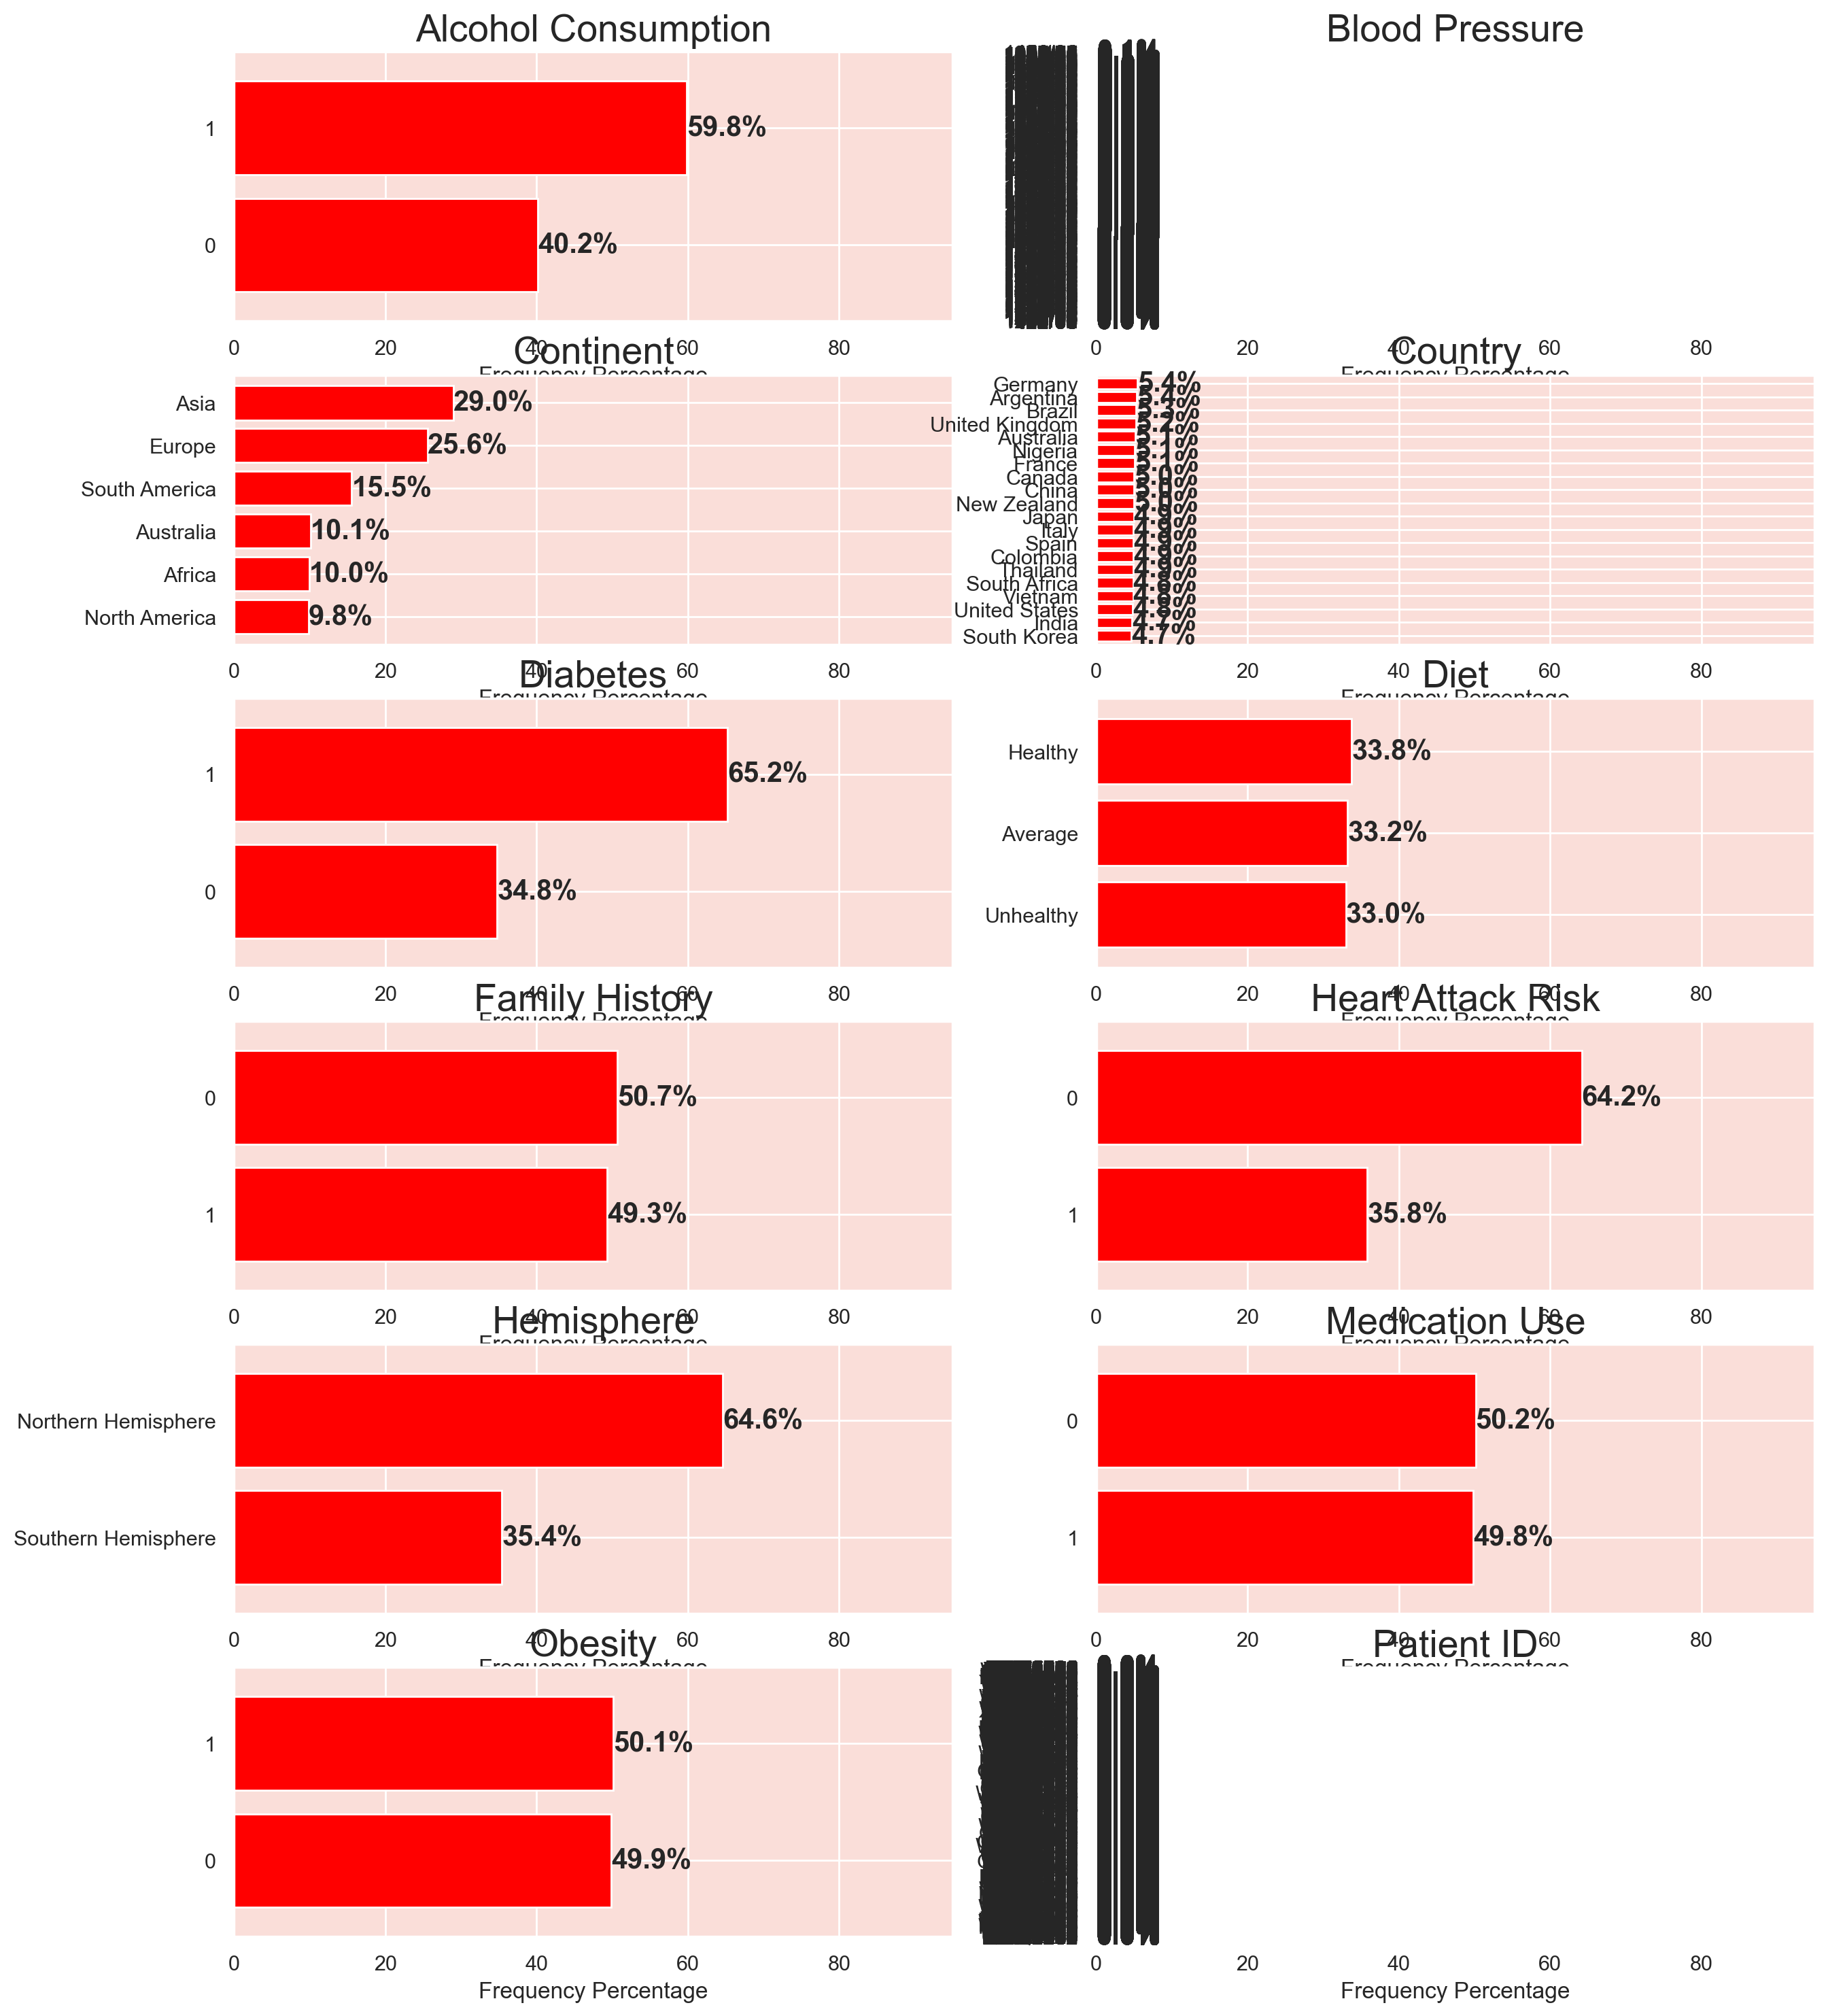

In [14]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()